## Import the Libraries and prepare the data

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [22]:
dataset = fetch_california_housing()
x = dataset['data']
y = dataset['target']
print(x.shape, y.shape)

(20640, 8) (20640,)


In [23]:
#print(dataset.DESCR)
feature_names = dataset['feature_names']
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


**Feature Engineering - Calculate the Mutual Info Regression and check the relationship and importance**


## Filter Based

In [24]:
mir = mutual_info_regression(x,y)

In [25]:
print(mir)

[0.38758552 0.03015653 0.10311251 0.02423517 0.02091743 0.07259503
 0.3716441  0.40003255]


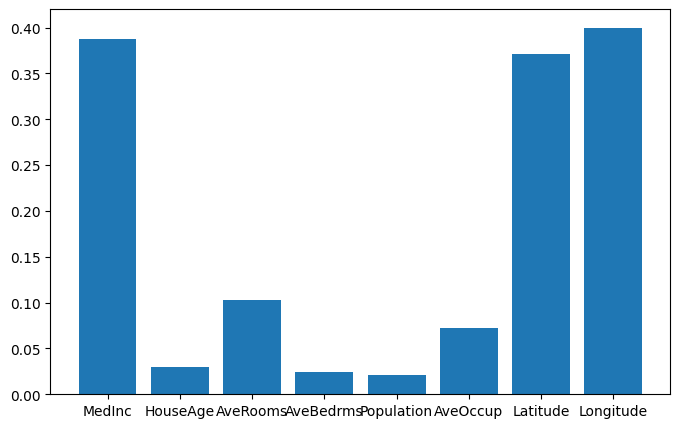

In [26]:
plt.figure(figsize=(8,5))
plt.bar(feature_names,mir)
plt.show()

Use Select Percentile or SelectKBest to fit transform the newly selected features in another transformation space

In [27]:
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x,y)
print(x_new.shape)

(20640, 4)


In [28]:
x_new_k = SelectKBest(mutual_info_regression, k=4).fit_transform(x,y)
print(x_new_k.shape)

(20640, 4)


**Train the model, predict and check the R2 score for evaluation**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.5834998918727385
0.5621324080003363


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_new_k, y, test_size=0.2)

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.5683976850573629
0.5985989331922087


**Use pearson correlation - f_regression**

In [33]:
x_new_pearson = SelectKBest(f_regression, k=4).fit_transform(x,y)
print(x_new_pearson.shape)

(20640, 4)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_new_pearson, y, test_size=0.2)

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.5289002296524559
0.6321814504569983


**Use pandas correlation function**

In [36]:
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [37]:
print(x_pd.corr())

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


<Axes: >

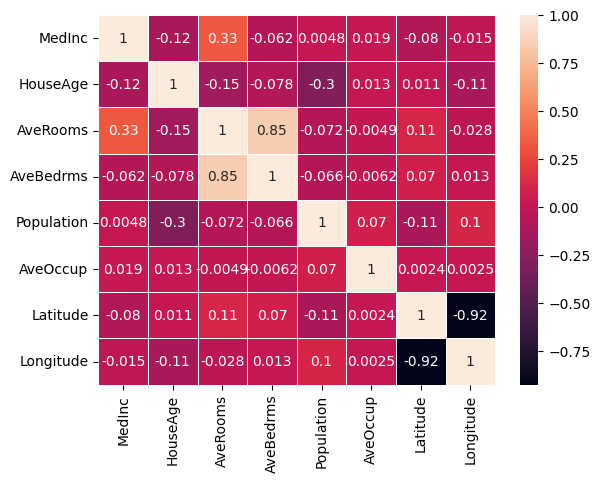

In [38]:
sns.heatmap(x_pd.corr(), annot=True, linewidth=0.5)

In [39]:
x_new = x_pd.drop(['HouseAge','Population'], axis=1)
print(x_new.head(4))
print(x_new.shape)

   MedInc  AveRooms  AveBedrms  AveOccup  Latitude  Longitude
0  8.3252  6.984127   1.023810  2.555556     37.88    -122.23
1  8.3014  6.238137   0.971880  2.109842     37.86    -122.22
2  7.2574  8.288136   1.073446  2.802260     37.85    -122.24
3  5.6431  5.817352   1.073059  2.547945     37.85    -122.25
(20640, 6)


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.6024832791403018
0.5341196503857693


## Recursive Feature Elimination (Wrapper based)


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

In [43]:
housing = fetch_california_housing()
X,y = housing.data, housing.target

estimator = Lasso()
selector = RFE(estimator=estimator, n_features_to_select=5, step=1).fit(X,y)
print(selector.ranking_,)

[1 1 4 3 1 2 1 1]


In [44]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.578085939331103
0.5577731825280613


## Sequential Feature Selection (Wrapper based)


In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

In [47]:
housing = fetch_california_housing()
X,y = housing.data, housing.target

ridge = RidgeCV().fit(X,y)
sfs_forward=SequentialFeatureSelector(ridge,n_features_to_select="auto", direction="forward").fit(X,y)
print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')


In [48]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.5449441216440213
0.5969691725336166


## PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
dataset = fetch_california_housing()
x = dataset['data']
y = dataset['target']
print(x.shape, y.shape)

# y is not needed as this is unsupervised. But no interpretebility.
x_new_pca = PCA(n_components=6, svd_solver='full').fit_transform(x)
print(x_new_pca.shape)

(20640, 8) (20640,)
(20640, 6)


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_new_pca, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.5464291578806408
0.6219001364671783
